### Importing Required Libraries

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from sklearn import metrics
from tensorflow.keras.metrics import Precision, Recall,CategoricalAccuracy
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
import json

### Visualizing a Sample Image

In [9]:
img = cv2.imread(os.path.join('FinalDataset/train/King Thutmose III/006.jpg'))

In [ ]:
type(img)

numpy.ndarray

In [11]:
img.shape

(490, 349, 3)

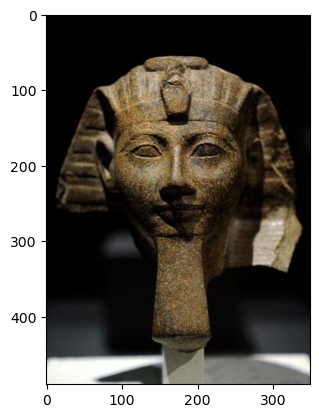

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### Data Configuration

In [18]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
image_size = (IMG_HEIGHT, IMG_WIDTH)
batch_size = 32

In [19]:
train_data_dir='FinalDataset/train'
validation_data_dir='FinalDataset/val'

In [ ]:
class_labels = [
    'Akhenaten','AmenhotepIII',' Bent pyramid for senefru','Colossoi of Memnon',
    'Goddess Isis','Hatshepsut face','Khafre Pyramid','King Thutmose III',
    'Mask of Tutankhamun','Nefertiti','Pyramid_of_Djoser','Ramesses II',
    'Ramessum','Statur of King Zoser','Statue of Tutankhamun with Ankhesenamun',
    'Temple_of_Hatshepsut','Temple_of_Isis_in_Philae','Temple_of_Kom_Ombo',
    'The Great Temple of Ramesses II','menkaure pyramid','sphinx'
]

### Data Augmentation and Loading

In [20]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                	shear_range=0.1,
					zoom_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest')

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='rgb',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 14159 images belonging to 21 classes.


In [23]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='rgb',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 4062 images belonging to 21 classes.


### Displaying Sample Images with Class Labels


In [25]:
img, label = train_generator.__next__()

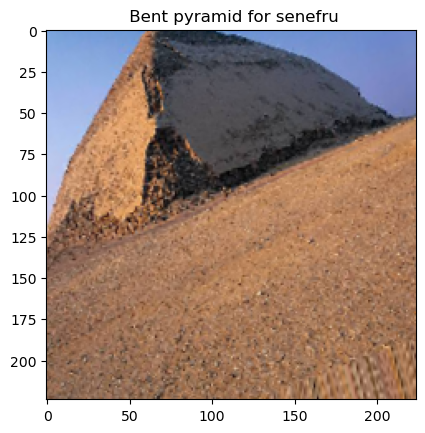

In [26]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image)
plt.title(labl)
plt.show()

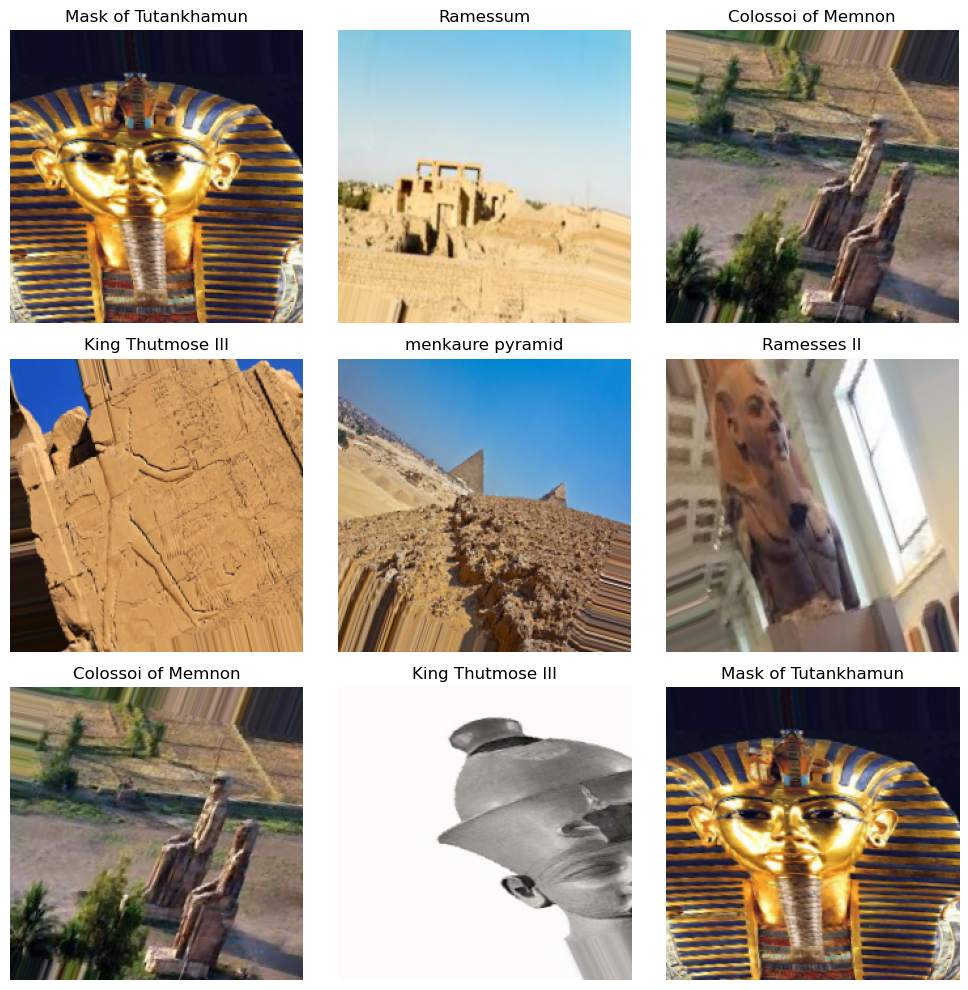

In [ ]:
np.random.seed(42)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
random_indices = np.random.randint(0, img.shape[0], size=9)

for i, ax in enumerate(axes.flat):
    image = img[random_indices[i]]
    labl = class_labels[label[random_indices[i]].argmax()]
    ax.imshow(image)
    ax.set_title(labl)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Building and Compiling the CNN Model

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(21, activation='softmax'))

In [102]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 220, 220, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      88,605,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 21)                  │          10,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,004,373 (339.52 MB)

 Trainable params: 89,004,373 (339.52 MB)

 Non-trainable params: 0 (0.00 B)

None


### Training the Model and Saving the Final Version

In [105]:
train_path = "/kaggle/input/finaldataset/FinalDataset/train"
test_path = "/kaggle/input/finaldataset/FinalDataset/test"

In [106]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [107]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [108]:
epochs=50


In [ ]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)


Epoch 1/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 256s 557ms/step - accuracy: 0.1906 - loss: 2.7241 - val_accuracy: 0.4122 - val_loss: 1.8861
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.1875 - loss: 2.1897 - val_accuracy: 0.4137 - val_loss: 1.8606
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 235s 523ms/step - accuracy: 0.3981 - loss: 1.9147 - val_accuracy: 0.3667 - val_loss: 1.6873
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5312 - loss: 1.7379 - val_accuracy: 0.4732 - val_loss: 1.6513
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 247s 551ms/step - accuracy: 0.4971 - loss: 1.6097 - val_accuracy: 0.6235 - val_loss: 1.2537
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5938 - loss: 1.1620 - val_accuracy: 0.6667 - val_loss: 1.1691
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 248s 552ms/step - accuracy: 0.5630 - loss: 1.3601 - val_accuracy: 0.6488 - val_loss: 1.1242
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5312 - loss: 1.

In [110]:
model.save('/kaggle/working/pharos_detection_model224.keras')

### Plotting Training and Validation Accuracy and Loss

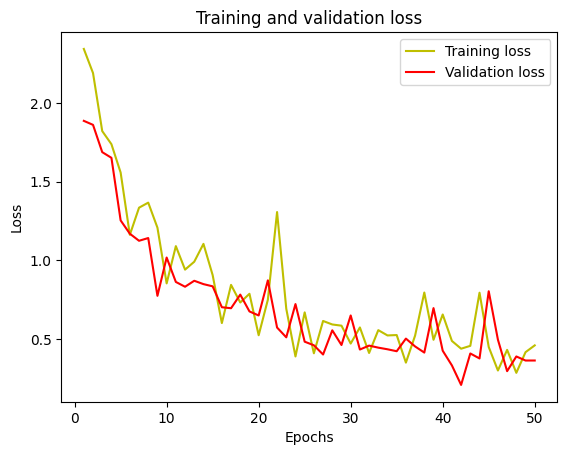

In [111]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

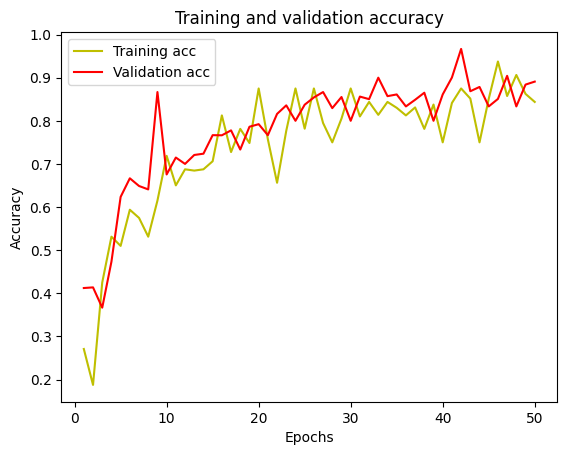

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate on a Batch from Validation Set

In [113]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
test_img, test_lbl = validation_generator.__next__()
predictions=model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy =  0.9375


### Visualize a Sample Prediction

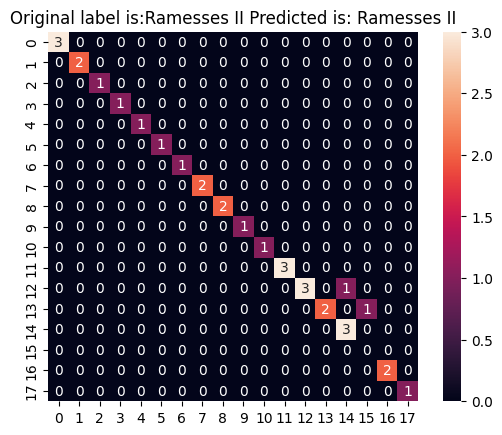

In [ ]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True)

class_labels = ['Akhenaten','AmenhotepIII',' Bent pyramid for senefru','Colossoi of Memnon','Goddess Isis','Hatshepsut face','Khafre Pyramid','King Thutmose III','Mask of Tutankhamun','Nefertiti','Pyramid_of_Djoser','Ramesses II','Ramessum','Statur of King Zoser','Statue of Tutankhamun with Ankhesenamun','Temple_of_Hatshepsut','Temple_of_Isis_in_Philae','Temple_of_Kom_Ombo','The Great Temple of Ramesses II','menkaure pyramid','sphinx']#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image)
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

### Prepare the Test Data Generator

In [3]:
test_data_dir='D:/Graduation_Project/FinalDataset/test'

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,                    
    target_size=(224, 224),     
    batch_size=32,              
    class_mode='categorical',    
    shuffle=False 
)


Found 2035 images belonging to 21 classes.


In [ ]:
test_generator.reset()

### Load Final Model and Predict on Entire Test Set

In [9]:
model_224=load_model('D:/Graduation_Project/Neural_Project/pharos_detection_model224.keras')

In [ ]:
predictions = model_224.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)


64/64 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step


In [13]:
true_classes = test_generator.classes

In [14]:
accuracy = accuracy_score(true_classes, predicted_classes)
print("✅ Final Test Accuracy =", accuracy)

✅ Final Test Accuracy = 0.8810810810810811


### Plot Confusion Matrix for All Classes

📋 Classification Report:

                                         precision    recall  f1-score   support

                              Akhenaten       0.79      0.88      0.83        96
                           AmenhotepIII       0.83      0.73      0.78        96
               Bent pyramid for senefru       0.88      0.86      0.87        97
                     Colossoi of Memnon       0.80      0.93      0.86        97
                           Goddess Isis       0.84      0.89      0.86        98
                        Hatshepsut face       0.93      0.94      0.93        96
                         Khafre Pyramid       0.70      0.88      0.78        98
                      King Thutmose III       0.90      0.77      0.83        97
                    Mask of Tutankhamun       1.00      0.95      0.97        98
                              Nefertiti       0.81      0.92      0.86        96
                      Pyramid_of_Djoser       0.95      0.77      0.85        97
 

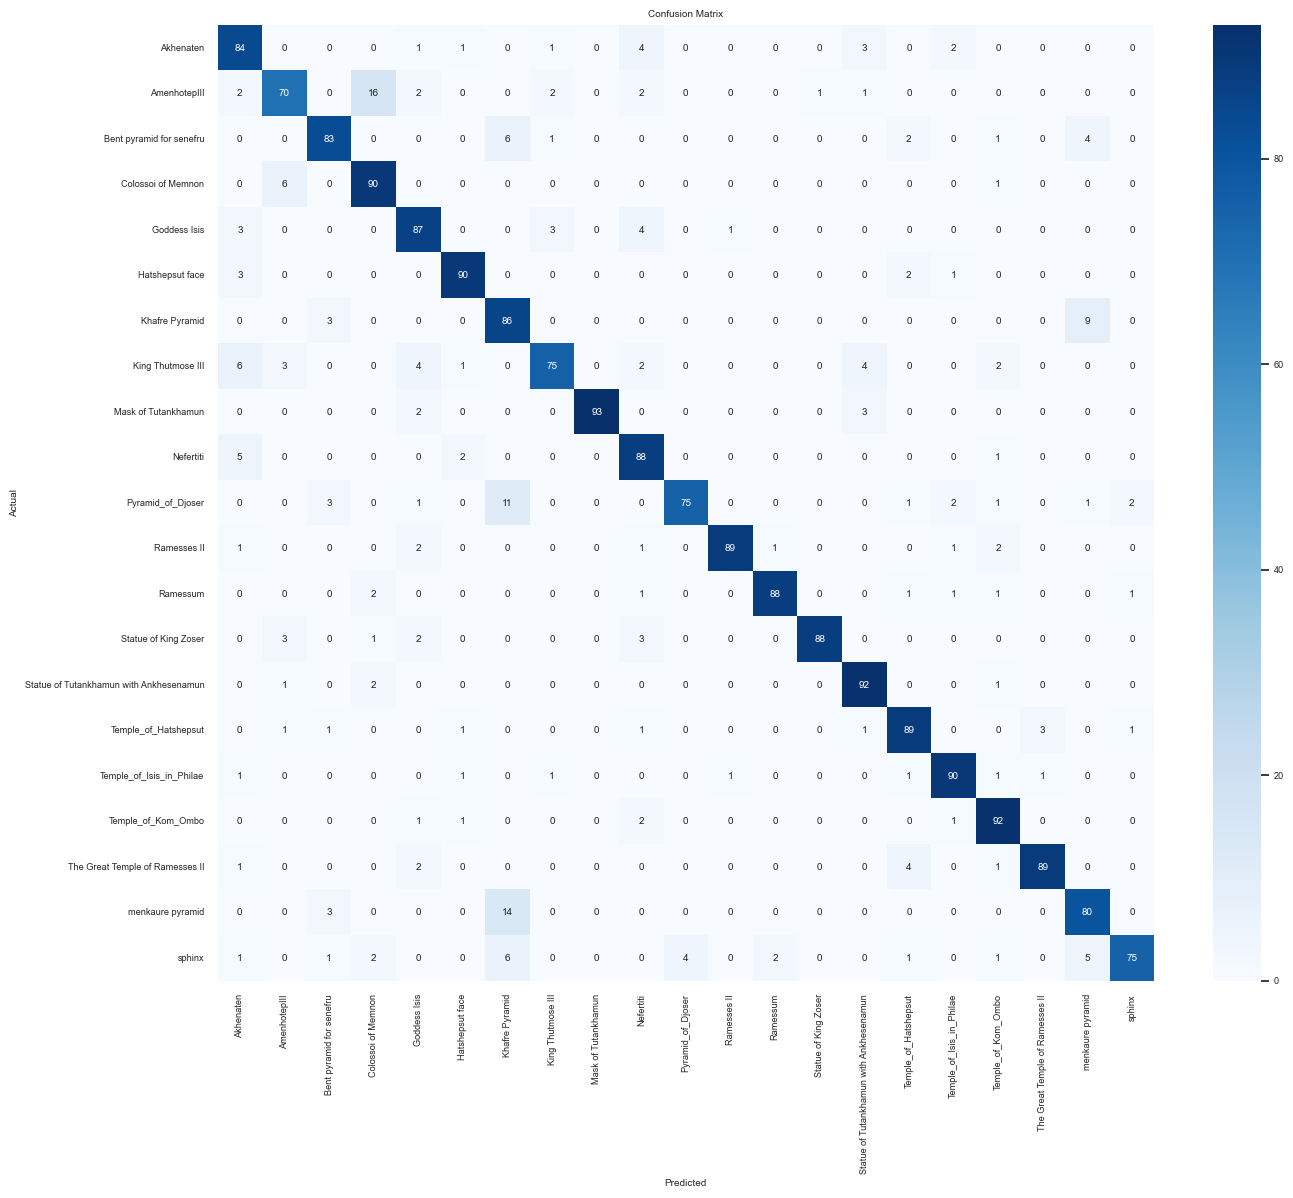

In [57]:
class_names = list(test_generator.class_indices.keys())
print("📋 Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Predict on a Single Image and Display Historical Info

In [60]:
img_path = 'FinalDataset/test/Akhenaten/204.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [64]:
with open('class_info.json', 'r', encoding='utf-8') as f:
    class_info = json.load(f)

In [66]:
predictions = model_224.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [67]:
predicted_class_name = class_labels[predicted_class_index]
info = class_info.get(predicted_class_name, "No Information Available For This Class")

In [68]:
print(f"\n📸 The Predicted Class: {predicted_class_name}")
print(f"\n📜 Historic Information: \n{info}")


📸 The Predicted Class: Akhenaten

📜 Historic Information: 
Akhenaten was a pharaoh of the Eighteenth Dynasty of Egypt who ruled for 17 years. He is known for abandoning traditional Egyptian polytheism and introducing worship centered on Aten, the sun disk. His reign is marked by a dramatic shift in art and culture, often referred to as the Amarna Period.
